## 4.1.1 Two Classes

y(x) = $w^{T}$x + $w_{0}$

where, w is the weight vector and $w_{0}$ represents the bias.

The decision boundary is then defined as y(x) = 0, such that:

$y(x) \  \in C_{1} \  if \ y(x) \geq 0$

$y(x) \  \in C_{2} \  if \ y(x) < 0$

The decision boundary corresponds to a (D-1) dimensional hyperplane for D-dimensional input vectors (x).

### Properties of the binary decision surface

* The decision surface is orthogonal (perpendicular) to the weight vector

> Consider two points $x_{A}$ and $x_{B}$ on the decision surface, $y(x_{A}) = 0$ and $y(x_{B}) = 0$, this implies that $y(x_{A}) - y(x_{B}) =0$ and thus, $w^{T}(x_{A} - x_{B}) = 0$. Hence, the weight vector $w$ lies orthogonal to the decision surface (or any point lying on the decison surface) and so the weight vector determines the orientation of the decision boundary.

* The bias vector $w_{0}$ determines the location of the decision surface. If $x$ is a point on the decision surface, then y(x) = 0, and so the normal distance from the origin to the decision surface is given as, $\frac{w^{T}x}{||w||} = -\frac{w_{0}}{||w||}$

* The value of y(x) gives a signed measure of the perpendicular distance $r$ of the point $x$ from the decision surface.

These properties are illustrated in the following figure.

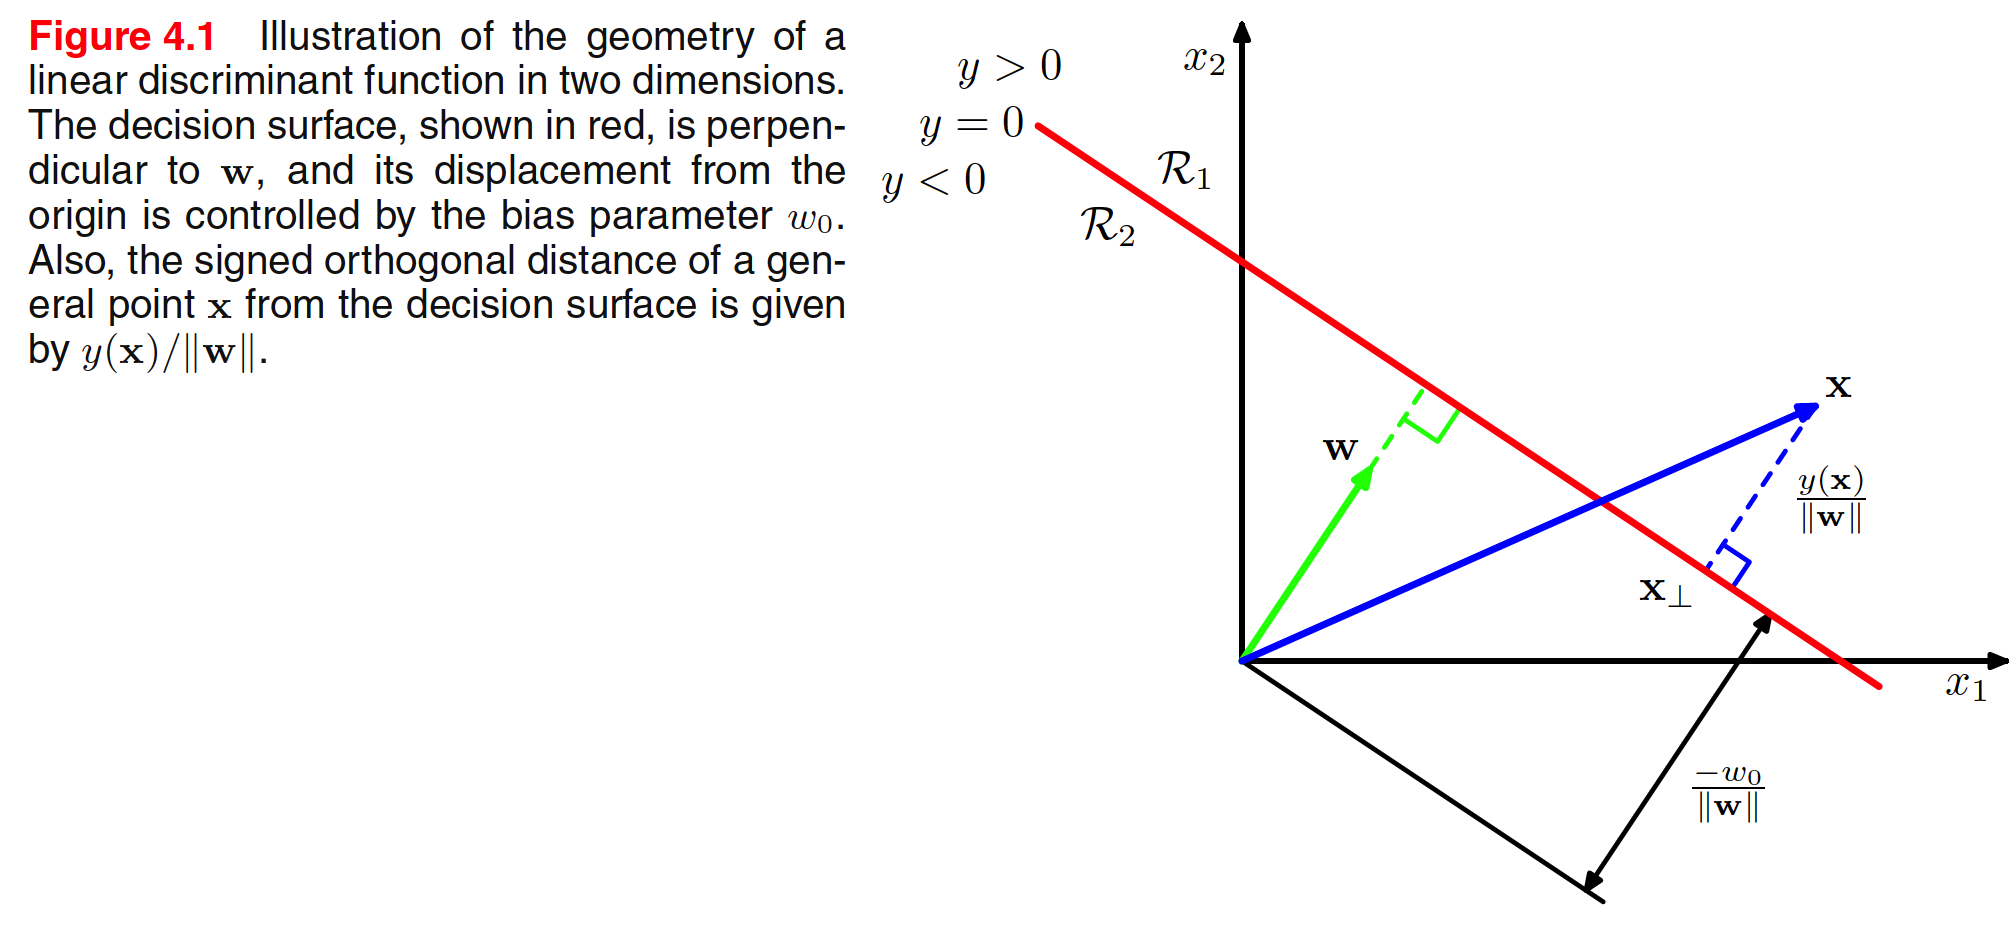

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# import from prml library
import sys
sys.path.append("/Users/apple/Documents/Courses/Machine Learning Youtube 2020/Codes/")


from prml.preprocess import PolynomialFeature
from prml.linear import (
    BayesianLogisticRegression,
    LeastSquaresClassifier,
    FishersLinearDiscriminant,
    LogisticRegression,
    Perceptron,
    SoftmaxRegression
)

np.random.seed(1)

In [3]:
def create_toy_data(add_outliers=False, add_class=False):
    x0 = np.random.normal(size=50).reshape(-1, 2) - 1
    x1 = np.random.normal(size=50).reshape(-1, 2) + 1.
    if add_outliers:
        x_1 = np.random.normal(size=10).reshape(-1, 2) + np.array([5., 10.])
        return np.concatenate([x0, x1, x_1]), np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int)
    if add_class:
        x2 = np.random.normal(size=50).reshape(-1, 2) + 3.
        return np.concatenate([x0, x1, x2]), np.concatenate([np.zeros(25), np.ones(25), 2 + np.zeros(25)]).astype(np.int)
    return np.concatenate([x0, x1]), np.concatenate([np.zeros(25), np.ones(25)]).astype(np.int)

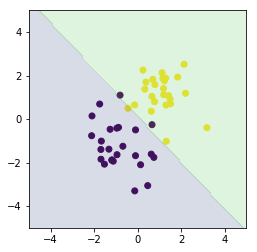

In [4]:
x_train, y_train = create_toy_data()
x1_test, x2_test = np.meshgrid(np.linspace(-5, 5, 100), np.linspace(-5, 5, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

model = LeastSquaresClassifier()
model.fit(X_train, y_train)
y = model.classify(X_test)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

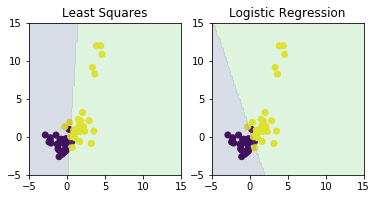

In [5]:
x_train, y_train = create_toy_data(add_outliers=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 15, 100), np.linspace(-5, 15, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)

logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_lr = logistic_regression.classify(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least Squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.linspace(0, 1, 3))
plt.xlim(-5, 15)
plt.ylim(-5, 15)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Logistic Regression")
plt.show()

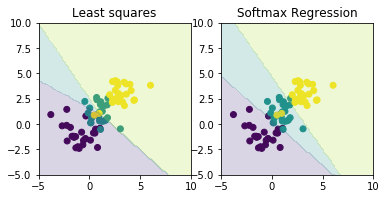

In [6]:
x_train, y_train = create_toy_data(add_class=True)
x1_test, x2_test = np.meshgrid(np.linspace(-5, 10, 100), np.linspace(-5, 10, 100))
x_test = np.array([x1_test, x2_test]).reshape(2, -1).T

feature = PolynomialFeature(1)
X_train = feature.transform(x_train)
X_test = feature.transform(x_test)

least_squares = LeastSquaresClassifier()
least_squares.fit(X_train, y_train)
y_ls = least_squares.classify(X_test)

logistic_regression = SoftmaxRegression()
logistic_regression.fit(X_train, y_train, max_iter=1000, learning_rate=0.01)
y_lr = logistic_regression.classify(X_test)

plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_ls.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Least squares")
plt.subplot(1, 2, 2)
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train)
plt.contourf(x1_test, x2_test, y_lr.reshape(100, 100), alpha=0.2, levels=np.array([0., 0.5, 1.5, 2.]))
plt.xlim(-5, 10)
plt.ylim(-5, 10)
plt.gca().set_aspect('equal', adjustable='box')
plt.title("Softmax Regression")
plt.show()